In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
from GeneralModel import *

In [29]:
def Flow(t, x, params):
    mu = params["mu"]
    k = 0.05
    
    theta0, theta1, theta2 = x[0], x[1], x[2]
    r0,     r1,     r2     = x[3], x[4], x[5]
    
    dtheta0 = -1 - 0.4*(r0**2*np.cos(theta0)**2 - 1)*np.sin(theta0)*np.cos(theta0) + k * np.sum([np.sin(tj-theta0) for tj in [theta0,theta1,theta2]])
    dtheta1 = -1 - 0.5*(r1**2*np.cos(theta1)**2 - 1)*np.sin(theta1)*np.cos(theta1) + k * np.sum([np.sin(tj-theta1) for tj in [theta0,theta1,theta2]])
    dtheta2 = -1 - 0.45*(r2**2*np.cos(theta2)**2 - 1)*np.sin(theta2)*np.cos(theta2) + k * np.sum([np.sin(tj-theta2) for tj in [theta0,theta1,theta2]])
    
    dr0     = -0.4*(r0**2*np.cos(theta0)**2 - 1)*r0*np.sin(theta0)**2
    dr1     = -0.5*(r1**2*np.cos(theta1)**2 - 1)*r1*np.sin(theta1)**2
    dr2     = -0.45*(r2**2*np.cos(theta2)**2 - 1)*r2*np.sin(theta2)**2
    
    return np.array([dtheta0,dtheta1,dtheta2,dr0,dr1,dr2])

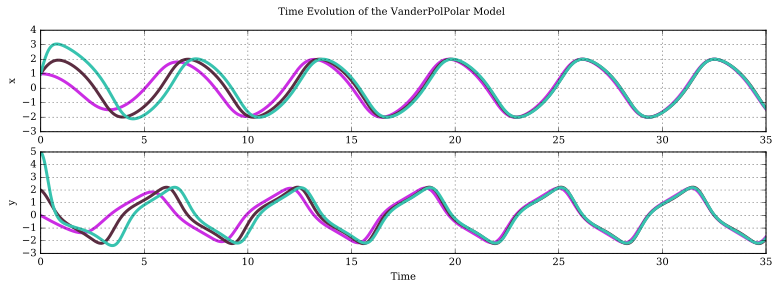

In [33]:
VDP = GeneralModel(Name="VanderPolPolar", tstart=0, tend=35, dt=0.01, mu=0.5) 
VDP.Initialize([np.arctan2(0,1),np.arctan2(2,1),np.arctan2(5,1),np.sqrt(0**2+1**2),np.sqrt(2**2+1**2),np.sqrt(5**2+1**2)]) 
VDP.Simulate(Flow=Flow, UpdateMethod="RungeKutta") 
plt.rcParams["figure.figsize"] = (13, 4)
VDP.PolarPlotState(states={"theta":[0,1,2],"r":[3,4,5]},statelabels=["x","y"],legend=["1","2","3"])